# Detección de anomalías con  iForest

Basado en un dataset que contiene mediciones del **consumo de energía eléctrica** en un hogar con una tasa de muestreo de un minuto durante un período de casi 4 años. Están disponibles diferentes magnitudes eléctricas y algunos valores de submedición.

**Dataset**: [https://patricioaraneda.cl/public_data/household_power_consumption.txt](https://patricioaraneda.cl/public_data/household_power_consumption.txt)

Información de atributos:
1. dt: Fecha en formato dd/mm/aaaa hh:mm:ss
2. Global_active_power: potencia activa global promediada por minuto del hogar (en kilovatios)
3. Global_reactive_power: potencia reactiva global media por minuto del hogar (en kilovatios)
4. voltage: voltaje medio por minuto (en voltios)
5. Global_intensity: intensidad de corriente promediada por minutos global del hogar (en amperios)
6. Sub_metering_1: submedición de energía nº 1 (en vatios-hora de energía activa). Corresponde a la cocina, que contiene principalmente un lavavajillas, un horno y un microondas (las placas no son eléctricas sino de gas).
7. Sub_metering_2: submedición de energía nº 2 (en vatios-hora de energía activa). Corresponde al lavadero, que contiene una lavadora, una secadora, un frigorífico y una luz.
8. Sub_metering_3: submedición de energía nº 3 (en vatios-hora de energía activa). Corresponde a un calentador de agua eléctrico y a un aire acondicionado.

### Indicaciones

Complete el código solicitado y **atengase a responder las preguntas asociadas**. Recuerde que hay muchas formas de encontrar soluciones entre las muchas funciones disponibles para ello. **Elija la mejor disponible**.

Las librerías mostradas son solo referenciales, sea libre de elegir las que necesite.

Recuerde; sin E.D.A. no hay Data Science.


In [ ]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

<ipython-input-1-c6a66dae5805>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [ ]:
# carga de datos en objeto df
data = pd.read_csv('https://patricioaraneda.cl/public_data/household_power_consumption.txt', sep=';',
                        parse_dates={'dt' : ['Date', 'Time']},
                        infer_datetime_format=True,low_memory=False,
                        na_values=['nan','?'])


1. Cúantos registros tiene el dataset original? (1pt)

In [ ]:
num_registros = len(data)
print("El dataset 'data' tiene", num_registros, "registros.")


El dataset 'data' tiene 2075259 registros.


Como el dataset original tiene muchos registros, deberá:
2. Crear un subconjunto de datos que contenga el 10% de los datos originales y seleccionadaos en forma aleatoria. Este nuevo conjunto asignelo a una variable "df". (2pt)

Cúanto registros tiene este nuevo dataset?

In [ ]:
import pandas as pd
import numpy as np

# Crear el subconjunto aleatorio del 10%
df = data.sample(frac=0.1, random_state=42)

# Obtener el número de registros en el nuevo dataset
num_registros_nuevo = len(df)
print("El nuevo dataset 'df' tiene", num_registros_nuevo, "registros.")


El nuevo dataset 'df' tiene 207526 registros.


Recuerde que tendrá que hacer mediciones con los datos asi que asegurese que tengan un formato numerico:

3. Cambie si es necesario las variables necesarias para que sean numéricas (3pt)

In [ ]:
import pandas as pd

# Convertir las variables necesarias a formato numérico
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'], errors='coerce')
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'], errors='coerce')
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'], errors='coerce')
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'], errors='coerce')
df['Sub_metering_3'] = pd.to_numeric(df['Sub_metering_3'], errors='coerce')

# Verificar el tipo de datos después de la conversión
print(df.dtypes)


dt                       datetime64[ns]
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
dtype: object


4. ¿Cuál es el tipo de la variable 'Voltage' (1pt)

In [ ]:
# genere el código necesario para responder
tipo_voltage = df['Voltage'].dtype
print("El tipo de la variable 'Voltage' es:", tipo_voltage)


El tipo de la variable 'Voltage' es: float64


5. ¿cuáles son los valores mínimo y máximo de la variable 'Voltage'? (2pt)

In [ ]:
# genere acá el código necesario para responder
voltage_minimo = df['Voltage'].min()
voltage_maximo = df['Voltage'].max()

print("El valor mínimo de la variable 'Voltage' es:", voltage_minimo)
print("El valor máximo de la variable 'Voltage' es:", voltage_maximo)


El valor mínimo de la variable 'Voltage' es: 224.67
El valor máximo de la variable 'Voltage' es: 253.75


6. ¿Existe alguna variable con más del 30% de valores faltantes? (4pt)

In [ ]:
umbral_faltantes = 0.3  # Umbral del 30% de valores faltantes

# Calcular la proporción de valores faltantes por variable
prop_faltantes = df.isna().mean()

# Filtrar las variables que superan el umbral de faltantes
variables_con_faltantes = prop_faltantes[prop_faltantes > umbral_faltantes]

# Imprimir las variables con más del 30% de valores faltantes
if len(variables_con_faltantes) > 0:
    print("Las siguientes variables tienen más del 30% de valores faltantes:")
    for variable in variables_con_faltantes.index:
        print(variable)
else:
    print("No hay variables con más del 30% de valores faltantes.")



No hay variables con más del 30% de valores faltantes.


7. cree a partir de la columna fecha (dt) dos nuevas columnas (fecha) de tipo fecha y (hora) de tipo time. (5pt)

In [ ]:
# genere acá el código necesario para responder
import pandas as pd

# Crear la columna 'fecha' de tipo fecha
df['fecha'] = pd.to_datetime(df['dt']).dt.date

# Crear la columna 'hora' de tipo time
df['hora'] = pd.to_datetime(df['dt']).dt.time

# Imprimir las primeras filas del DataFrame con las nuevas columnas
print(df.head())


                         dt  Global_active_power  Global_reactive_power  \
1870606 2010-07-07 18:10:00                0.256                  0.106   
213926  2007-05-14 06:50:00                0.466                  0.352   
409006  2007-09-26 18:10:00                0.758                  0.194   
265806  2007-06-19 07:30:00                1.290                  0.046   
1786279 2010-05-10 04:43:00                0.428                  0.202   

         Voltage  Global_intensity  Sub_metering_1  Sub_metering_2  \
1870606   242.00               1.2             0.0             0.0   
213926    237.22               2.4             0.0             2.0   
409006    238.66               3.2             0.0             1.0   
265806    240.64               5.4             1.0             0.0   
1786279   242.23               1.8             0.0             2.0   

         Sub_metering_3       fecha      hora  
1870606             1.0  2010-07-07  18:10:00  
213926              0.0  2007-05

8. Para los algoritmos de clustering el dataset no puede tener instancias con datos faltantes. ¿Tiene este dataset datos faltantes? (2pt)

In [ ]:
# genere acá el código necesario para responder
# Verificar la cantidad de valores faltantes por columna
valores_faltantes = df.isnull().sum()

# Contar el total de valores faltantes en el dataset
total_valores_faltantes = valores_faltantes.sum()

if total_valores_faltantes > 0:
    print("El dataset tiene valores faltantes.")
    print("Cantidad total de valores faltantes:", total_valores_faltantes)
    print("Valores faltantes por columna:")
    print(valores_faltantes)
else:
    print("El dataset no tiene valores faltantes.")


El dataset tiene valores faltantes.
Cantidad total de valores faltantes: 18221
Valores faltantes por columna:
dt                          0
Global_active_power      2603
Global_reactive_power    2603
Voltage                  2603
Global_intensity         2603
Sub_metering_1           2603
Sub_metering_2           2603
Sub_metering_3           2603
fecha                       0
hora                        0
dtype: int64


9. ¿Porque de debe haber datos faltantes o nulos en este caso? responda con sus conocimientos adquiridos en su investigación (siin codigo) (10pt)

Escriba acá su repuesta: Según los aputes subidos en clases, y trabajos hecho en grupo, puede decir, que los datos faltantes o nulos se producen por multiples factores, uno de ellos puede ser fallas de captura de datos, transcripción de datos, calidad de la muestra. Si no mal recuerdo, en R studio era mas represetativo los valores nulos o faltantes, ya que, ahí podiamos graficar y ver los valores negros como faltantes, y realizar una limpieza dependiendo del porcentaje que era + del 50%.
Tambien puede haber ausencia de datos, por:
-Missing not at random
-Missing at random
-Missing completely at random

10. Si existieran datos faltantes, se prescindirá de ellos. (2pt)

In [ ]:
# genere acá el código necesario para responder
# Eliminar las filas con valores faltantes
df_sin_faltantes = df.dropna()

# Verificar el número de registros en el nuevo dataset sin valores faltantes
num_registros_sin_faltantes = len(df_sin_faltantes)
print("El nuevo dataset sin valores faltantes tiene", num_registros_sin_faltantes, "registros.")


El nuevo dataset sin valores faltantes tiene 204923 registros.


11. Determine las correlaciones de Pearson de las variables. (4pt)

In [ ]:
# genere acá el código necesario para responder
# Calcular las correlaciones de Pearson
correlaciones = df.corr()

# Imprimir las correlaciones
print(correlaciones)


                       Global_active_power  Global_reactive_power   Voltage  \
Global_active_power               1.000000               0.249093 -0.400842   
Global_reactive_power             0.249093               1.000000 -0.114910   
Voltage                          -0.400842              -0.114910  1.000000   
Global_intensity                  0.998877               0.268383 -0.412391   
Sub_metering_1                    0.485333               0.124582 -0.192540   
Sub_metering_2                    0.429481               0.141339 -0.165817   
Sub_metering_3                    0.638436               0.087634 -0.270874   

                       Global_intensity  Sub_metering_1  Sub_metering_2  \
Global_active_power            0.998877        0.485333        0.429481   
Global_reactive_power          0.268383        0.124582        0.141339   
Voltage                       -0.412391       -0.192540       -0.165817   
Global_intensity               1.000000        0.490104        0.43

<ipython-input-78-f3c03f45a056>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlaciones = df.corr()


12.¿Algún gráfico (al menos dos), como preliminar para mostrar los datos de mayor interés? (5pt)

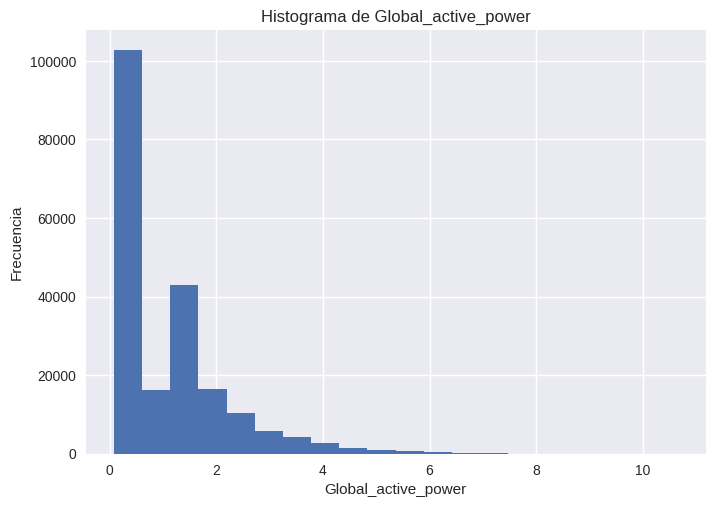

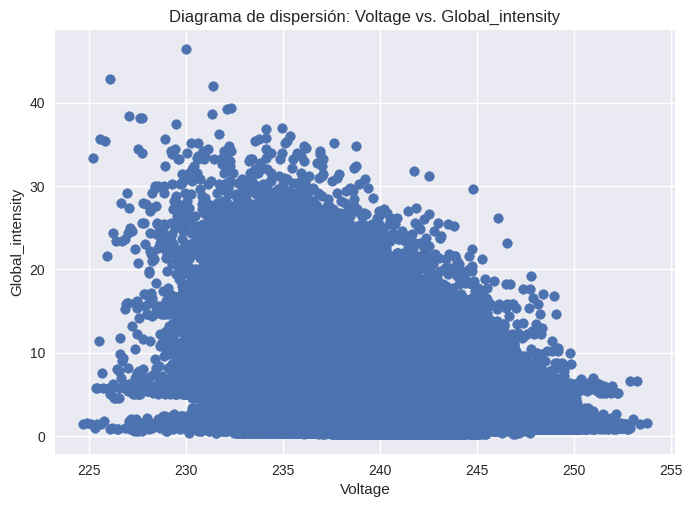

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df['Global_active_power'], bins=20)
plt.xlabel('Global_active_power')
plt.ylabel('Frecuencia')
plt.title('Histograma de Global_active_power')
plt.show()
import matplotlib.pyplot as plt

plt.scatter(df['Voltage'], df['Global_intensity'])
plt.xlabel('Voltage')
plt.ylabel('Global_intensity')
plt.title('Diagrama de dispersión: Voltage vs. Global_intensity')
plt.show()


### Bien, ahora podemos entrar en materia.

13. Basado en el algoritmo del Bosque de aislamiento (Isolation forest) realice **los procedimientos necesarios** para detectar si hay o no **valores anómalos** en el dataset. (15pt)

- Reserve un 5% de los datos iniciales para hacer pruebas del modelo con datos no vistos.
- Utilice del 95% restante, el 80% para entrenamiento y el 20% para test
- Defina y ajuste el modelo.
- Evalue el modelo.
- Determine la cantidad de anomalías.

In [ ]:
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Paso 1: División del dataset
# Reservar el 5% de los datos iniciales para pruebas
X, X_test = train_test_split(df_sin_faltantes, test_size=0.05, random_state=42)

# Utilizar el 95% restante para entrenamiento y evaluación
X_train, X_val = train_test_split(X, test_size=0.2, random_state=42)

# Paso 2: Preparación de los datos
# Seleccionar las variables relevantes
features = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1',
            'Sub_metering_2', 'Sub_metering_3']

# Dividir los datos de entrenamiento en características (X_train) y etiquetas (y_train)
X_train = X_train[features]

# Paso 3: Definir y ajustar el modelo
# Crear una instancia del modelo Isolation Forest
model = IsolationForest(random_state=42)

# Ajustar el modelo utilizando los datos de entrenamiento
model.fit(X_train)

# Paso 4: Evaluación del modelo
# Utilizar los datos de prueba (X_val) para evaluar el rendimiento del modelo
X_val = X_val[features]

# Calcular el puntaje de anomalía para cada instancia en los datos de prueba
anomaly_scores = model.decision_function(X_val)

# Paso 5: Determinar la cantidad de anomalías
# Establecer un umbral para clasificar las instancias como normales o anómalas
threshold = np.percentile(anomaly_scores, 5)  # Umbral para clasificar el 5% de las instancias como anomalías

# Contar el número de instancias clasificadas como anomalías
num_anomalies = np.sum(anomaly_scores < threshold)

# Imprimir el resultado
print("Cantidad de anomalías detectadas:", num_anomalies)



Cantidad de anomalías detectadas: 1947


14. Incluya un plot 3d TSNE para los outliers (4pt)

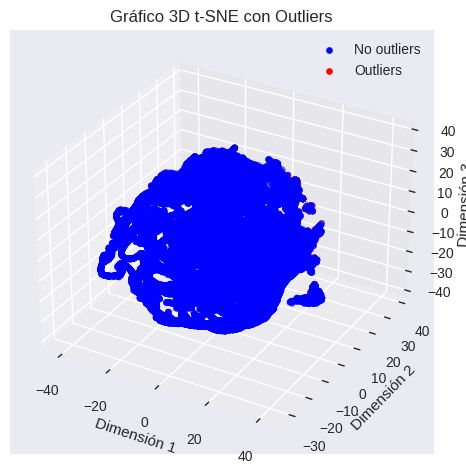

In [ ]:
# Paso adicional: Gráfico 3D de t-SNE para los outliers
# Obtener características reducidas mediante t-SNE
tsne = TSNE(n_components=3, random_state=42)
reduced_features = tsne.fit_transform(X_val)

# Identificar los outliers
outliers = X_val[anomaly_scores < threshold]

# Obtener las coordenadas de los outliers en el gráfico 3D de t-SNE
outliers_coordinates = reduced_features[anomaly_scores < threshold]

# Crear el gráfico 3D de t-SNE con los outliers resaltados
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar las características reducidas de todos los datos
ax.scatter(reduced_features[:, 0], reduced_features[:, 1], reduced_features[:, 2], c='blue', label='No outliers')

# Graficar las características reducidas de los outliers en rojo
ax.scatter(outliers_coordinates[:, 0], outliers_coordinates[:, 1], outliers_coordinates[:, 2], c='red', label='Outliers')

ax.set_xlabel('Dimensión 1')
ax.set_ylabel('Dimensión 2')
ax.set_zlabel('Dimensión 3')
ax.set_title('Gráfico 3D t-SNE con Outliers')

plt.legend()
plt.show()

15. Pruebe el modelo obtenido. Efectúe una predicción sobre el 5% de datos reservados del inicio. (4pt)

In [ ]:
# genere el código necesario para responder
# Paso 6: Predicción sobre los datos reservados del inicio
# Seleccionar las variables relevantes del conjunto de datos de prueba reservado del inicio
X_test = X_test[features]

# Calcular el puntaje de anomalía para cada instancia en los datos reservados del inicio
anomaly_scores_test = model.decision_function(X_test)

# Establecer un umbral para clasificar las instancias como normales o anómalas
threshold_test = np.percentile(anomaly_scores_test, 5)  # Umbral para clasificar el 5% de las instancias como anomalías

# Clasificar las instancias en función del umbral
predictions_test = anomaly_scores_test < threshold_test

# Imprimir las predicciones
print("Predicciones sobre los datos reservados del inicio:")
print(predictions_test)


Predicciones sobre los datos reservados del inicio:
[False False False ... False False False]


16. Sus conclusiones? (15pt)




```
# Tiene formato de código
```

*Conclusiones*:

Bueno como conclusión, al igual que la mayoría de trabajos, se buscó realizar el mismo procedimiento que en Rstudio, buscar números faltantes, anómalos, la correlación, se comparaban, ver cómo se comportaban y cómo se graficaban.

Se puede decir, además, que el los gráficos de comparación tienen una distribución exponencial declinada, entre más crece el eje X más se reduce el eje y. Por lo menos, en el histograma y el diagrama de dispersión.

En el gráfico 3D t-SNE con outliers, se ve que solamente presenta o se ve netamente valores NO OUTLIERS, y los valores OUTLIERS no aparece ninguno.

Además vimos la correlación de pearson, que netamente hace la correlación existente entre todas las variables, para ver si los datos de cada categorias tienen alguna relación en su comportamiento.

